# Text Mining and Sentiment Analysis with NLTK and pandas in Python



## Data import

In [206]:
import pandas as pd

# Import some Tweets from Elon Musk 
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets.csv")
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@Albi_SideArms maybe i will …
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyR6NAwap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@SawyerMerritt 🤣🤣


## Data transformation

In [207]:
df['text'] = df['text'].astype(str).str.lower()
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣


## Tokenization

- Install [NLTK](https://anaconda.org/anaconda/nltk): 

```bash
conda install -c anaconda nltk
```


- We use NLTK's [RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html) to perform [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) in combination with regular expressions. 

- To learn more about regular expressions ("regexp"), visit the following sites:


- [regular expression basics](https://www.w3schools.com/python/python_regex.asp).
- [interactive regular expressions tool](https://regex101.com/)

- `\w+` matches Unicode word characters with one or more occurrences; 
- this includes most characters that can be part of a word in any language, as well as numbers and the underscore.

In [208]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)


,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …,"[albi_sidearms, maybe, i, will]"
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,"[jack, https, t, co, ueyr6nawap]"
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣,[sawyermerritt]


## Stopwords

- Stop words are words in a stop list which are dropped before analysing natural language data since they don't contain valuable information (like "will", "and", "or", "has", ...).

In [209]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [210]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

- We use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) to remove the stopwords:

In [211]:
# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …,"[albi_sidearms, maybe]"
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,"[jack, co, ueyr6nawap]"
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣,[sawyermerritt]


## Remove infrequent words

- We first change the format of `text_token` to strings and keep only words which are longer than 2 letters

In [212]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [213]:
df[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,@albi_sidearms maybe i will …,"[albi_sidearms, maybe]",albi_sidearms maybe
1,@jack https://t.co/ueyr6nawap,"[jack, co, ueyr6nawap]",jack ueyr6nawap
2,@sawyermerritt 🤣🤣,[sawyermerritt],sawyermerritt
3,@sawyermerritt tesla china has done amazing work,"[sawyermerritt, tesla, china, done, amazing, w...",sawyermerritt tesla china done amazing work
4,@mrbeast 🙏,[mrbeast],mrbeast


- Create a list of all words

In [214]:
all_words = ' '.join([word for word in df['text_string']])

- Tokenize `all_words`

In [215]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

- Create a frequency distribution which records the number of times each word has occurred:

In [216]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'spacex': 7, 'sawyermerritt': 5, 'tesla': 5, '28delayslater': 5, 'billym2k': 4, 'rainmaker1973': 4, 'amp': 3, 'nasa': 3, 'way': 3, 'exactly': 3, ...})

- Use `fdist` to drop words which occur less than 2 times

In [217]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item]>2]))

In [218]:
df[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,@albi_sidearms maybe i will …,"[albi_sidearms, maybe]",albi_sidearms maybe,
1,@jack https://t.co/ueyr6nawap,"[jack, co, ueyr6nawap]",jack ueyr6nawap,
2,@sawyermerritt 🤣🤣,[sawyermerritt],sawyermerritt,sawyermerritt
3,@sawyermerritt tesla china has done amazing work,"[sawyermerritt, tesla, china, done, amazing, w...",sawyermerritt tesla china done amazing work,sawyermerritt tesla
4,@mrbeast 🙏,[mrbeast],mrbeast,


## Lemmatization

- Next, we perfom [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation).

In [219]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [220]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

- Note that in our small dataset, there are no words to lemmatize. We can check this as follows:

In [221]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

In [222]:
# show level count
df.is_equal.value_counts()

True    72
Name: is_equal, dtype: int64

## Word cloud

- Install [wordcloud](https://amueller.github.io/word_cloud/):

```bash
conda install -c conda-forge wordcloud
```

- [Word cloud example gallery](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery)

In [225]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

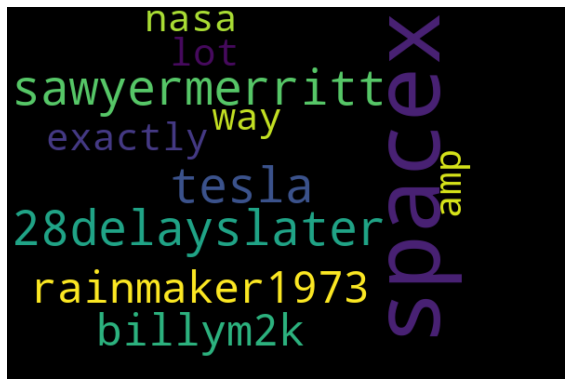

In [226]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

- Different style:

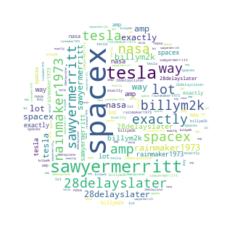

In [227]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

## Frequency distributions

In [228]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jankirenz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [229]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

### Most common words

In [230]:
fd.most_common(3)

[('spacex', 7), ('sawyermerritt', 5), ('tesla', 5)]

In [231]:
fd.tabulate(3)

       spacex sawyermerritt         tesla 
            7             5             5 


### Plot common words

In [232]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

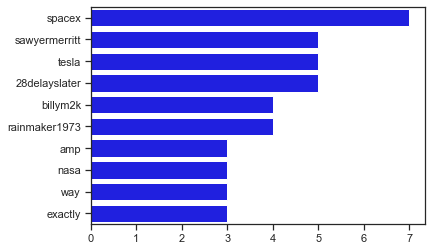

In [233]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [234]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

### Search specific words

In [235]:
# Show frequency of a specific word
fd["nasa"]

3

## Sentiment analysis



### VADER lexicon

- NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for "Valence Aware Dictionary and Sentiment Reasoner" (Hutto & Gilbert, 2014).

In [236]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Sentiment 

### Sentiment Intensity Analyzer

- Initialize an object of `SentimentIntensityAnalyzer` with name "analyzer":

In [237]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

### Polarity scores

- Use the `polarity_scores` method:

In [238]:
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,Unnamed: 0,created_at,id,author_id,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
69,69,2021-12-03T19:22:34.000Z,1466850364012044288,44196397,@evafoxu @sawyermerritt huge cranes are cool haha,"[evafoxu, sawyermerritt, huge, cranes, cool, h...",evafoxu sawyermerritt huge cranes cool haha,sawyermerritt,sawyermerritt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
70,70,2021-12-03T19:20:15.000Z,1466849780253003782,44196397,@ppathole @ercxspace @spacex this will look so...,"[ppathole, ercxspace, spacex, look, awesome]",ppathole ercxspace spacex look awesome,spacex,spacex,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
71,71,2021-12-03T19:18:44.000Z,1466849402534907910,44196397,@evafoxu @sawyermerritt i love norway! 🇳🇴 ♥️🇳🇴,"[evafoxu, sawyermerritt, love, norway]",evafoxu sawyermerritt love norway,sawyermerritt,sawyermerritt,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


### Transform data

In [239]:
# Change data structure
df = pd.concat(
    [df.drop(['Unnamed: 0', 'id', 'author_id', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,created_at,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,2021-12-10T07:20:45.000Z,@albi_sidearms maybe i will …,"[albi_sidearms, maybe]",albi_sidearms maybe,,,True,0.0,0.0,0.0,0.0
1,2021-12-10T07:19:05.000Z,@jack https://t.co/ueyr6nawap,"[jack, co, ueyr6nawap]",jack ueyr6nawap,,,True,0.0,0.0,0.0,0.0
2,2021-12-10T06:44:19.000Z,@sawyermerritt 🤣🤣,[sawyermerritt],sawyermerritt,sawyermerritt,sawyermerritt,True,0.0,1.0,0.0,0.0


In [240]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,created_at,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,2021-12-10T07:20:45.000Z,@albi_sidearms maybe i will …,"[albi_sidearms, maybe]",albi_sidearms maybe,,,True,0.0,0.0,0.0,0.0,neutral
1,2021-12-10T07:19:05.000Z,@jack https://t.co/ueyr6nawap,"[jack, co, ueyr6nawap]",jack ueyr6nawap,,,True,0.0,0.0,0.0,0.0,neutral
2,2021-12-10T06:44:19.000Z,@sawyermerritt 🤣🤣,[sawyermerritt],sawyermerritt,sawyermerritt,sawyermerritt,True,0.0,1.0,0.0,0.0,neutral
3,2021-12-10T04:42:00.000Z,@sawyermerritt tesla china has done amazing work,"[sawyermerritt, tesla, china, done, amazing, w...",sawyermerritt tesla china done amazing work,sawyermerritt tesla,sawyermerritt tesla,True,0.0,1.0,0.0,0.0,neutral


### Analyze data

In [241]:
# Tweet with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array(['2021-12-10T07:20:45.000Z', '@albi_sidearms maybe i will …',
       list(['albi_sidearms', 'maybe']), 'albi_sidearms maybe', '', '',
       True, 0.0, 0.0, 0.0, 0.0, 'neutral'], dtype=object)

In [242]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

array(['2021-12-10T07:20:45.000Z', '@albi_sidearms maybe i will …',
       list(['albi_sidearms', 'maybe']), 'albi_sidearms maybe', '', '',
       True, 0.0, 0.0, 0.0, 0.0, 'neutral'], dtype=object)

### Visualize data

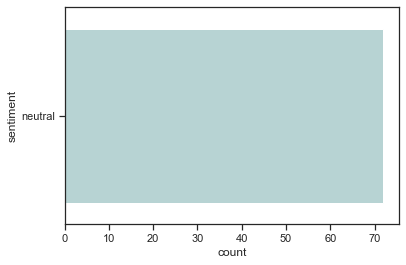

In [243]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

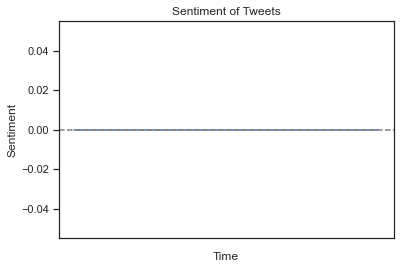

In [244]:
# Lineplot
g = sns.lineplot(x='created_at', y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

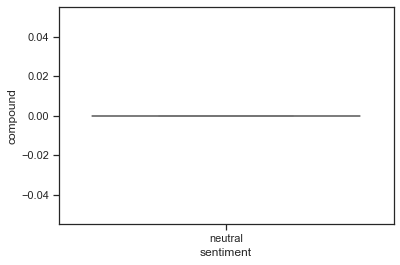

In [245]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

Literature:

[Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.](https://ojs.aaai.org/index.php/ICWSM/article/view/14550)